<a href="https://colab.research.google.com/github/wahyunirosyidah/Machine-Learning-Terapan/blob/main/Proyek_1_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset :  Telecom Customer Churn Prediction

# Import Library

In [885]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import math
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


# Data Loading

In [886]:
url = 'https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv'
data = pd.read_csv(url)
data

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.6,Yes


# Exploratory Data Analysis

## Deskripsi Variabel


- customerID : berisi id dari customer
- Gender : berisi data jenis kelamin customer
- SeniorCitizen : berisi data apakah pelanggan merupakan lansia atau bukan
- Partner : berisi data apakah pelanggan memiliki pasangan atau tidak
- Dependents : berisi data apakah pelanggan memiliki tanggungan (anak, orang tua, dll) atau tidak
- Tenure : berisi data lama berlangganan pelanggan dalam bulan
- PhoneService berisi data apakah pelanggan memiliki layanan telepon
- MultipleLines : berisi data apakah pelanggan memiliki lebih dari satu saluran telepon
- InternetService : berisi data jenis internet service yang digunakan
- OnlineSecurity : berisi data apakah pelanggan berlangganan layanan internet service atau tidak
- OnlineBackup berisi data apakah pelanggan berlangganan layanan online backup atau tidak
- DeviceProtection :  berisi data apakah pelanggan berlangganan layanan proteksi pelanggan atau tidak
- TechSupport berisi data apakah pelanggan memiliki dukungan service atau tidak
- StreamingTV : berisi data apakah pelanggan menggunakan layanan streaming tv atau bukan
- StreamingMovies : berisi data apakah pelanggan menggunakan layanan streaming film atau bukan
- Contract berisi data jenis kontrak belangganan pelanggan
- PaperlessBilling : berisi data apakah pelanggan menggunakan tagihan tanpa kertas atau tidak
- PaymentMethod : berisi data jenis metode pembayaran yang digunakan pelanggan
- MonthlyCharges : berisi data total biaya yang dibayar oleh pelanggan tiap bulannya
- TotalCharges : berisi data total biaya yang dibayar pelanggan selama menjadi pelanggan
- Churn : berisi data apakah pelanggan berhenti berlangganan atau tidak (target)         

In [887]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terlihat bahwa tipe data yang dimiliki oleh TotalCharge direpresentasikan dengan tipe object. Tipe data yang seharusnya dimiliki oleh variabel TotalCharges adalah float.

### Mengubah Tipe Data

In [888]:
#Cek data TotalCharges yang kosong
data[data['TotalCharges'].str.strip() == '']

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Manual,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Manual,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Manual,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Manual,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Manual,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Manual,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Manual,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Manual,73.35,,No


Dari tampilan diatas terlihat bahwa pada terdapat 11 data TotalCharge yang kosong namun tidak terdeteksi

In [889]:
#konversi tipe data
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
#cek kembali tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari tampilan diatas terlihat bahwa terdapat data yang hilang pada variabel TotalCharge setelah dilakukan konversi tipe data.

In [890]:
data.describe().round(4)

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.0000,7043.0000,7043.0000,7032.0000
mean,0.1621,32.3711,64.7617,2283.3004
std,0.3686,24.5595,30.0900,2266.7714
min,0.0000,0.0000,18.2500,18.8000
25%,0.0000,9.0000,35.5000,401.4500
50%,0.0000,29.0000,70.3500,1397.4750
75%,0.0000,55.0000,89.8500,3794.7375
max,1.0000,72.0000,118.7500,8684.8000


1. SeniorCitizen
    
    Jumlah pelanggan yang berusia lanjut hanya sebesar 0.1621 atau 16% yang menunjukkan mayoritas pelanggan berasa di usia produktif.

2. Tenure

    Rata-rata lama berlangganan pelanggan adalah sekitar 32.3711 bulan atau 2.7 tahun. 50% pelanggan paling lama berlangganan sampai 29 bulan.

3. MonthlyCharges

    Rata-rata biaya langganan per bulan seluruh pelanggan sebesar $64.7617 atau $65. Rentang biaya perbulan seluruh pelanggan adalah $18.25 - $118.75

4. TotalCharges

    Rata-rata total pembayaran seluruh pelanggan selama berlangganan adalah $2283.3004. TotalCharge berbanding lurus dengan  Tenure dimana semakin lama berlangganan, semakin besar total bayar.

## Missing Value

In [891]:
data.isnull().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Terdapat nilai yang kosong pada variabel TotalCharges

In [892]:
#memeriksa ukuran data sebelum dihapus
data.shape

(7043, 21)

In [893]:
#menghapus baris data yang memiliki data yang kosong
data.dropna(axis=0, inplace=True)

In [894]:
#cek missing value
data.isnull().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [895]:
#memeriksa ukuran data setelah dilakukan penghapusan data
data.shape

(7032, 21)

## Memeriksa Duplikasi Data

In [896]:
print(f'Jumlah data yang terduplikasi: {data.duplicated().sum()}')

Jumlah data yang terduplikasi: 0


## Menangani Outliers

In [897]:
data_numerik = data.select_dtypes(include=np.number).columns
data_numerik

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

<Axes: xlabel='SeniorCitizen'>

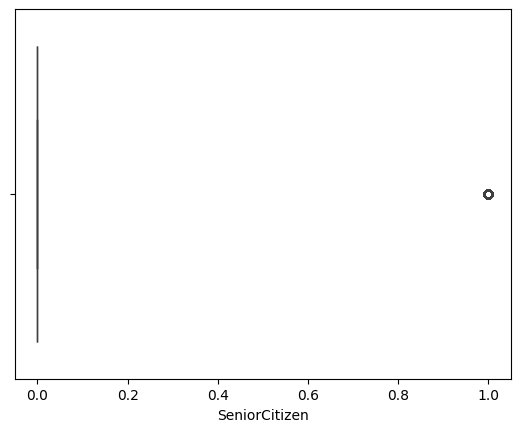

In [898]:
sns.boxplot(x=data['SeniorCitizen'])

Dari data SeniorCitizen terlihat bahwa terdapat outlier, namun karena data SeniorCitizen bernilai 0 dan 1 maka angka 1 bukan outlier dan dapat diabaikan saja.

<Axes: xlabel='Tenure'>

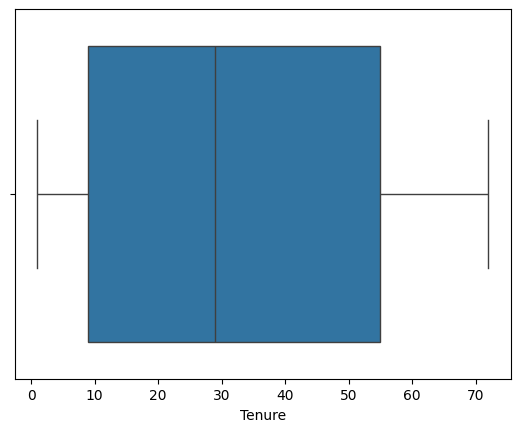

In [899]:
sns.boxplot(x=data['Tenure'])

Dari tampilan diatas terlihat bahwa data Tenure tidak memiliki outlier

<Axes: xlabel='MonthlyCharges'>

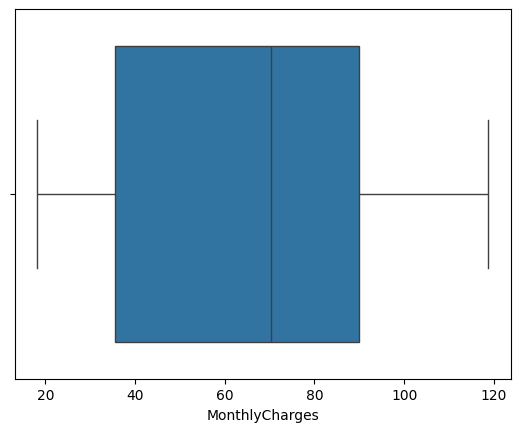

In [900]:
sns.boxplot(x=data['MonthlyCharges'])

Dari tampilan diatas terlihat bahwa data MonthlyCharges tidak memiliki outlier

In [901]:
data.duplicated().sum()

np.int64(0)

Hasil menunjukkan bawah tidak terdapat data yang terduplikasi

## Analysis

In [902]:
#drop tipe data yang tidak diperlukan
data_baru = data.drop(columns=['customerID'])

In [903]:
#Jumlah Variabel Seluruh dataset
print(f'{data_baru.columns}')
print(f'Jumlah Variable Pada Dataset : {len(data_baru.columns)}\n')

# Membagi data menjadi 2 bagian
data_numerik = data_baru.select_dtypes(include=np.number).columns
print(f'{data_numerik}')
print(f'Jumlah Variable Numerik : {len(data_numerik)}\n')

data_kategorikal = data_baru.select_dtypes(include='object').columns
print(f'{data_kategorikal}')
print(f'Jumlah Variable Kategorikal : {len(data_kategorikal)}')

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Jumlah Variable Pada Dataset : 20

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Jumlah Variable Numerik : 4

Index(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Jumlah Variable Kategorikal : 16


In [904]:
jenis_data = data_baru[data_kategorikal].nunique()
nilai_jenis_data = data_baru[data_kategorikal].apply(lambda x: sorted(x.unique()))
new_dataframe=pd.DataFrame({"Variabel": jenis_data, "Nilai-Nilai": nilai_jenis_data})
new_dataframe

,Variabel,Nilai-Nilai
Gender,2,"[Female, Male]"
Partner,2,"[No, Yes]"
Dependents,2,"[No, Yes]"
PhoneService,2,"[No, Yes]"
MultipleLines,2,"[No, Yes]"
InternetService,3,"[DSL, Fiber optic, No]"
OnlineSecurity,2,"[No, Yes]"
OnlineBackup,2,"[No, Yes]"
DeviceProtection,2,"[No, Yes]"
TechSupport,2,"[No, Yes]"


### Numerikal vs Churn

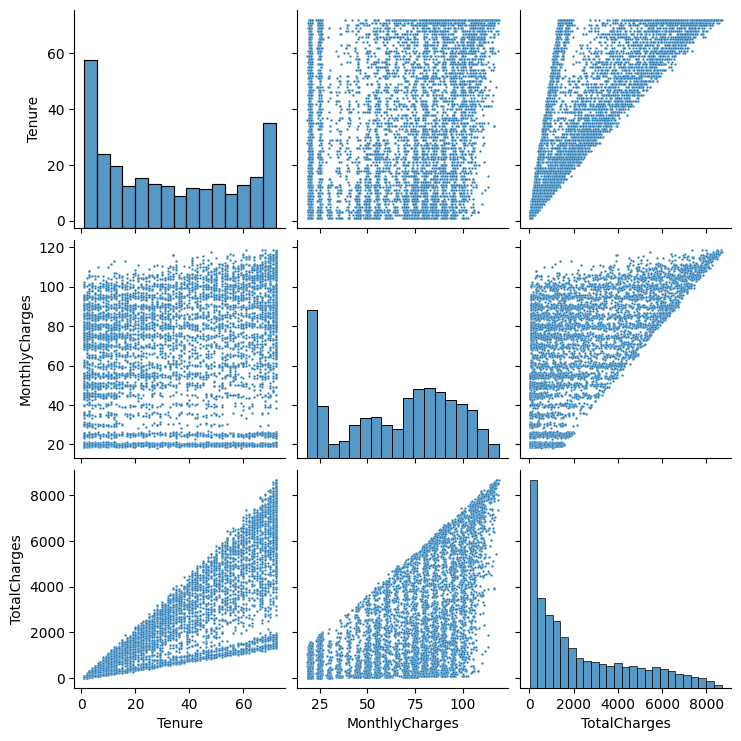

In [905]:
sns.pairplot(data_baru[['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], plot_kws={"s":3})

Berdasarkan hasil pairplot antara fitur numerik (Tenure, MonthlyCharges, TotalCharges) dan target (Churn), ditemukan beberapa pola penting:

- Fitur `Tenure` memiliki hubungan negatif dengan `Churn`. Pelanggan dengan masa langganan pendek lebih cenderung berhenti berlangganan.

- Fitur `MonthlyCharges` memiliki korelasi positif dengan `Churn`, di mana pelanggan dengan biaya bulanan tinggi menunjukkan kecenderungan untuk churn lebih besar.

- Fitur `TotalCharges` memiliki hubungan negatif dengan `Churn`, yang menunjukkan bahwa pelanggan yang telah mengeluarkan biaya besar (lebih lama berlangganan) lebih loyal.

Secara umum, pelanggan baru dan pelanggan dengan biaya bulanan tinggi menjadi segmen yang paling berisiko melakukan churn.

### Contract & PaymentMethod vs Churn

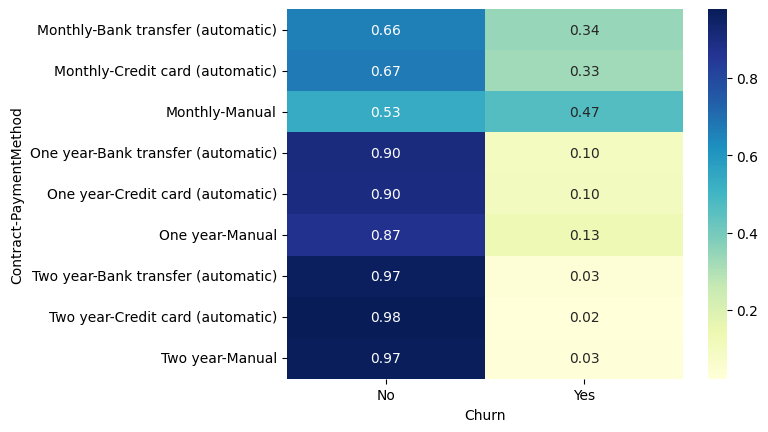

In [906]:
ct = pd.crosstab([data_baru['Contract'], data_baru['PaymentMethod']], data_baru['Churn'], normalize='index')
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

Berdasarkan hasil analisis antara fitur Contract, PaymentMethod, dan Churn, terlihat bahwa pelanggan dengan kontrak bulanan (Monthly) memiliki tingkat churn yang jauh lebih tinggi dibandingkan pelanggan dengan kontrak jangka menengah atau panjang (One year dan Two year). Pola ini semakin jelas pada pelanggan yang menggunakan metode pembayaran manual, di mana sekitar 47% pelanggan churn. Sebaliknya, pelanggan dengan kontrak dua tahun dan metode pembayaran otomatis (auto payment) menunjukkan tingkat churn yang sangat rendah, hanya sekitar 2–3%. Hal ini menunjukkan bahwa durasi kontrak dan kemudahan metode pembayaran memiliki pengaruh besar terhadap loyalitas pelanggan. Semakin panjang kontrak dan semakin otomatis sistem pembayarannya, semakin kecil kemungkinan pelanggan untuk berhenti berlangganan.

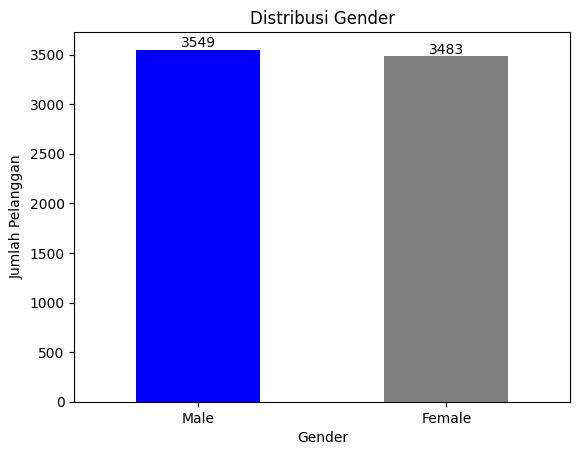

In [907]:
fitur_gender = data_kategorikal[0]
gender_count = data_baru[fitur_gender].value_counts()

#plotting
colors = ['gray'] * len(gender_count)  # Semua biru muda
colors[gender_count.argmax()] = 'blue'
gender_count.plot(kind='bar', title=fitur_gender, color=colors)

plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Gender")
plt.tick_params(axis='x', rotation=0)
#menampilkan angka di atas bar
for i, count in enumerate(gender_count):
    plt.text(i, count + 30, str(count), ha='center', fontsize=10)

plt.show()

Distribusi gender pelanggan menunjukkan komposisi yang sangat seimbang, di mana jumlah pelanggan Pria (Male) sedikit lebih banyak yaitu 3.549 orang, dibandingkan dengan pelanggan Wanita (Female) yang berjumlah 3.483 orang. Dengan selisih hanya 66 pelanggan, data ini mengindikasikan bahwa produk atau layanan yang diwakili oleh data ini bersifat netral gender dan berhasil menarik kedua kelompok dengan tingkat keberhasilan yang hampir setara.

# Data Preparation

## Encoding Fitur Kategori

One hot encoding

In [908]:
jenis_data = data_baru[data_kategorikal].nunique()
nilai_jenis_data = data_baru[data_kategorikal].apply(lambda x: sorted(x.unique()))
new_dataframe=pd.DataFrame({"Variabel": jenis_data, "Nilai-Nilai": nilai_jenis_data})
new_dataframe

,Variabel,Nilai-Nilai
Gender,2,"[Female, Male]"
Partner,2,"[No, Yes]"
Dependents,2,"[No, Yes]"
PhoneService,2,"[No, Yes]"
MultipleLines,2,"[No, Yes]"
InternetService,3,"[DSL, Fiber optic, No]"
OnlineSecurity,2,"[No, Yes]"
OnlineBackup,2,"[No, Yes]"
DeviceProtection,2,"[No, Yes]"
TechSupport,2,"[No, Yes]"


In [909]:
data_baru = pd.get_dummies(data_baru, drop_first=True)
data_baru['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

data_baru.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Manual,Churn_Yes,Churn
0,0,1,29.85,29.85,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,0
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,0
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,1
3,0,45,42.30,1840.75,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,0
4,0,2,70.70,151.65,False,False,False,True,False,True,...,False,False,False,False,False,True,False,True,True,1


In [910]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_Yes                      7032 non-null   bool   
 9   InternetService_Fiber optic            7032 non-null   bool   
 10  InternetService_No                     7032 non-null   bool   
 11  OnlineSec

### Train Split

In [911]:
X= data_baru.drop(['Churn'],axis=1)
y = data_baru["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=123)

In [912]:
print(f'Total Data of sample in whole dataset: {len(X)}')
print(f'Total Data Train of sample in train dataset: {len(X_train)}')
print(f'Total Data Test of sample in test dataset: {len(X_test)}')

Total Data of sample in whole dataset: 7032
Total Data Train of sample in train dataset: 6328
Total Data Test of sample in test dataset: 704


# Standarisasi

In [913]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler.fit(X_train[data_numerik])
X_train_scaled[data_numerik] = scaler.transform(X_train[data_numerik])
X_test_scaled[data_numerik] = scaler.transform(X_test[data_numerik])

# Model Development

In [914]:
results = pd.DataFrame(columns=['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1'])


## KNN

In [915]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
print("\nClassification Report - KNN:\n")
print(classification_report(y_test, y_pred_knn))

results.loc['KNN'] = [
    accuracy_score(y_train, knn.predict(X_train_scaled)),
    accuracy_score(y_test, y_pred_knn),
    f1_score(y_train, knn.predict(X_train_scaled)),
    f1_score(y_test, y_pred_knn)
]


Classification Report - KNN:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       517
           1       0.97      0.87      0.92       187

    accuracy                           0.96       704
   macro avg       0.96      0.93      0.94       704
weighted avg       0.96      0.96      0.96       704



## Logistic Regression

In [916]:
logreg = LogisticRegression(max_iter=1000, random_state=123)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)
print("\nClassification Report - Logistic Regression:\n")
print(classification_report(y_test, y_pred_logreg))

results.loc['Logistic Regression'] = [
    accuracy_score(y_train, logreg.predict(X_train_scaled)),
    accuracy_score(y_test, y_pred_logreg),
    f1_score(y_train, logreg.predict(X_train_scaled)),
    f1_score(y_test, y_pred_logreg)
]


Classification Report - Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       517
           1       1.00      1.00      1.00       187

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704



## XGBoost

In [917]:
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=123,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5
)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
print("\nClassification Report - XGBoost:\n")
print(classification_report(y_test, y_pred_xgb))

results.loc['XGBoost'] = [
    accuracy_score(y_train, xgb.predict(X_train_scaled)),
    accuracy_score(y_test, y_pred_xgb),
    f1_score(y_train, xgb.predict(X_train_scaled)),
    f1_score(y_test, y_pred_xgb)
]


Classification Report - XGBoost:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       517
           1       1.00      1.00      1.00       187

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704



# Evaluasi

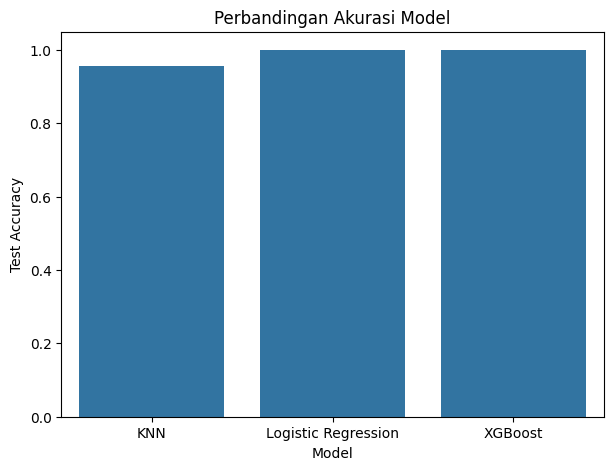

In [918]:
# Visualisasi hasil
plt.figure(figsize=(7,5))
sns.barplot(x=results.index, y=results['Test Accuracy'])
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Test Accuracy")
plt.xlabel("Model")
plt.show()

# Evaluasi

## Analisis Hasil

Berdasarkan hasil evaluasi, model **Logistic Regression** dan **XGBoost** menunjukkan performa yang sangat tinggi dengan nilai **accuracy** dan **F1-score** mencapai **1.00 (100%)** pada data uji.  
Meskipun demikian, hasil yang sempurna seperti ini **jarang terjadi pada data dunia nyata** dan dapat mengindikasikan adanya potensi *data leakage* atau *overfitting*.  

Beberapa kemungkinan penyebab fenomena tersebut antara lain:

### 1. Data Leakage (Kebocoran Data)
Model mungkin secara tidak sengaja memperoleh informasi dari data uji saat proses pelatihan, misalnya karena normalisasi dilakukan sebelum pembagian data atau terdapat fitur yang secara langsung merepresentasikan variabel target (*Churn*).

### 2. Pembagian Data yang Kurang Acak
Jika pembagian data pelatihan dan data uji tidak dilakukan secara acak atau proporsional, model dapat “mengenali” pola yang serupa antara keduanya, sehingga menghasilkan performa yang tampak sempurna.

### 3. Fitur yang Sangat Informatif
Beberapa fitur seperti `TotalCharges`, `Tenure`, dan `Contract` memiliki korelasi yang sangat kuat terhadap *Churn*, sehingga model dapat memprediksi hasil dengan tingkat kesalahan yang sangat rendah.


## Kesimpulan

Secara keseluruhan, baik **Logistic Regression** maupun **XGBoost** menunjukkan performa yang sangat baik dalam memprediksi pelanggan yang berpotensi *churn*.  
Namun, karena hasil evaluasi yang terlalu sempurna dapat menjadi indikasi adanya potensi *data leakage* atau *overfitting*, diperlukan evaluasi lanjutan untuk memastikan validitas model.  

Model **Logistic Regression** dapat dipilih sebagai **baseline model** karena:

- Struktur model yang sederhana dan mudah diinterpretasikan,  
- Performa tinggi,  
- Waktu komputasi yang efisien.  

Sementara itu, model **XGBoost** dapat digunakan pada tahap **pengembangan lanjutan** karena kemampuannya dalam menangani relasi *non-linear* antar fitur serta potensi peningkatan performa melalui optimasi *hyperparameter*.


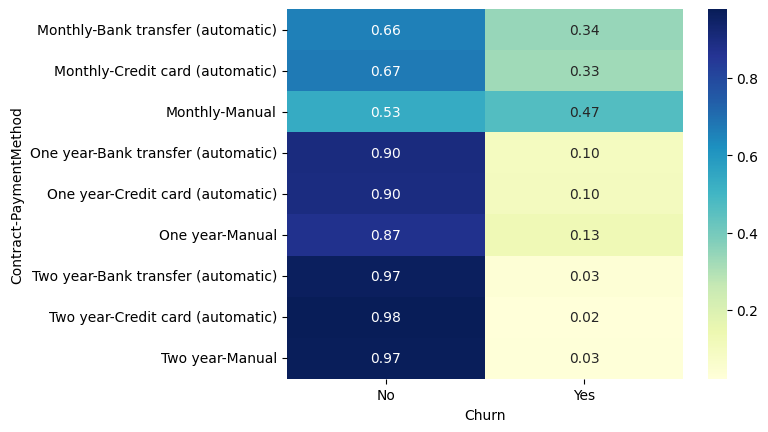

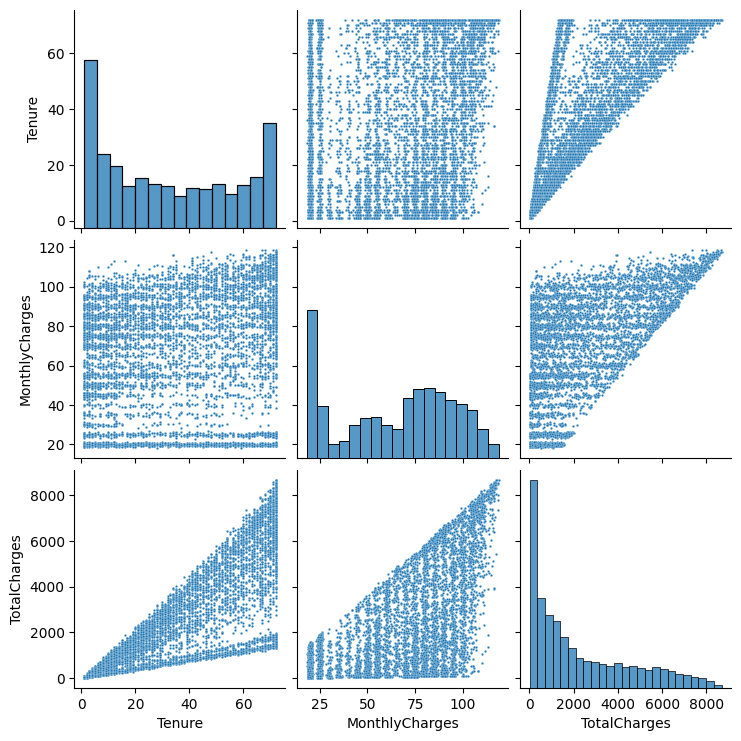